## Integrantes:
- Luis Francisco Rodriguez Acevedo

Implementar las siguientes funciones de transformaciones 2D
1. Escalar
2. Rotar
3. Transladar

In [39]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import cv2


def draw_triangle(im, triangle, color=(0,255,0)):
    # Dibuja el triángulo y sus vértices
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
   # Escala los vértices del triángulo
    matriz = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    Transformacion1 = matriz @ vertex.T # Transpuesto
    return Transformacion1.T

def rotate(vertex, a):
  # Rota los vértices del triángulo
    a = np.deg2rad(a)
    matriz = np.array([[np.cos(a),-np.sin(a),0],[np.sin(a),np.cos(a),0],[0,0,1]])
    Transformacion3 = matriz @ vertex.T
    return Transformacion3.T

def translate(vertex, dx, dy): #vertices X matriles
# Traslada los vértices del triángulo
    matriz = np.array([[1,0, dx],[0,1, dy],[0,0,1]])
    Transformacion2 = matriz @ vertex.T # Transpuesto
    return Transformacion2.T
# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)
# Parametros de las transformaciones
# Traslada a centro y realiza escala y rotacion
angle = 30
s = 3
t = 250
# Aplica transformaciones al triángulo original
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
# Imprimir
draw_triangle(im, triangle1)


### Escalar

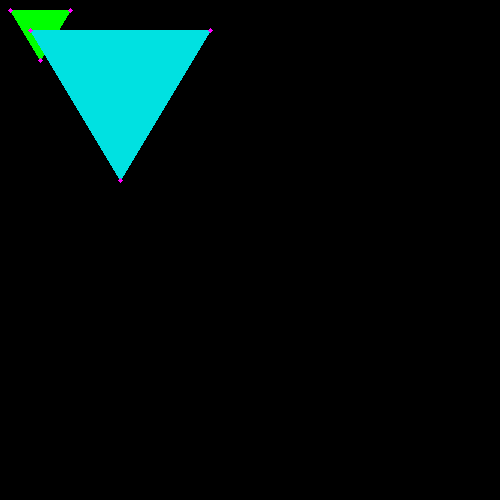

In [25]:
triangle2 = scale(triangle1, s,s)
draw_triangle(im, triangle2, color=(225,225,0)) #
cv2_imshow(im)

### Rotar

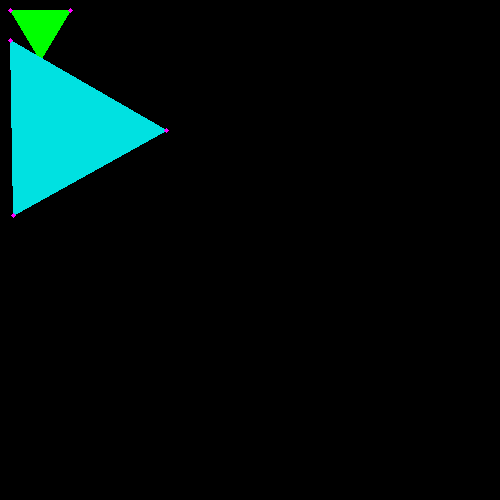

In [29]:
triangle3 = rotate(triangle2, angle)
draw_triangle(im, triangle3, color=(225,225,0)) #
cv2_imshow(im)

### Translacion

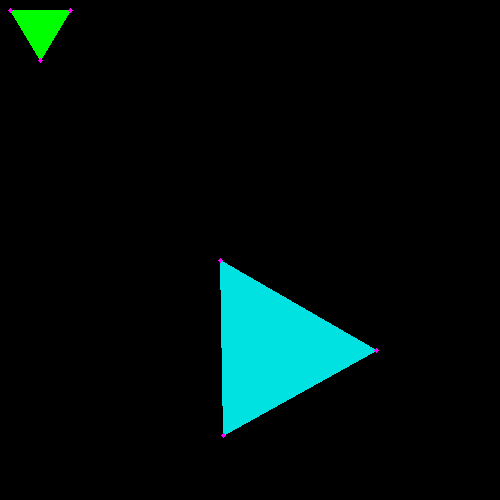

In [35]:
triangle4 = translate(triangle3, t,t)
triangle5 = translate(triangle4, -40,-30)
draw_triangle(im, triangle5, color=(225,225,0))
cv2_imshow(im)

### Las funciones reciben la información de una malla en coordenadas homogéneas en donde cada vértice es una fila de una matriz

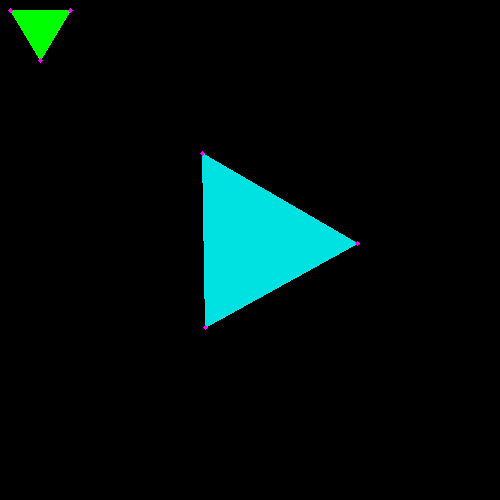

In [38]:
triangle6 = translate(rotate(scale(translate(triangle1, -40,-30),s,s) ,angle), t,t)
draw_triangle(im, triangle6, color=(225,225,0)) #
cv2_imshow(im)